<a href="https://colab.research.google.com/github/alletsr/SENSOR-FUSION-CLUSTER-1/blob/main/PROJECTION_OF_RADAR_POINTS_IN_IMAGE_USING_NUSCENCES_DEVKIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
!mkdir -p /data/sets/nuscenes  # Make the directory to store the nuScenes dataset in.

!wget https://www.nuscenes.org/data/v1.0-mini.tgz  # Download the nuScenes mini split.
!wget https://www.nuscenes.org/data/nuScenes-lidarseg-mini-v1.0.tar.bz2  # Download the nuScenes-lidarseg mini split.

!tar -xf v1.0-mini.tgz -C /data/sets/nuscenes  # Uncompress the nuScenes mini split.
!tar -xf nuScenes-lidarseg-mini-v1.0.tar.bz2 -C /data/sets/nuscenes   # Uncompress the nuScenes-lidarseg mini split.

!pip install nuscenes-devkit &> /dev/null  # Install nuScene

--2022-03-30 10:50:08--  https://www.nuscenes.org/data/v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 13.226.26.68, 13.226.26.125, 13.226.26.99, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|13.226.26.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4167696325 (3.9G) [application/x-tar]
Saving to: ‘v1.0-mini.tgz.1’

v1.0-mini.tgz.1     100%[===================>]   3.88G  37.9MB/s    in 1m 47s  

2022-03-30 10:51:55 (37.2 MB/s) - ‘v1.0-mini.tgz.1’ saved [4167696325/4167696325]

--2022-03-30 10:51:55--  https://www.nuscenes.org/data/nuScenes-lidarseg-mini-v1.0.tar.bz2
Resolving www.nuscenes.org (www.nuscenes.org)... 13.226.26.99, 13.226.26.90, 13.226.26.125, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|13.226.26.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1819477 (1.7M) [application/x-tar]
Saving to: ‘nuScenes-lidarseg-mini-v1.0.tar.bz2.1’

nuScenes-lidarseg-m 100%[===================>]   1.73M 

In [71]:
from nuscenes import NuScenes

In [72]:
dir(NuScenes)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__load_table__',
 '__lt__',
 '__make_reverse_index__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'box_velocity',
 'field2token',
 'get',
 'get_box',
 'get_boxes',
 'get_sample_data',
 'get_sample_data_path',
 'get_sample_lidarseg_stats',
 'getind',
 'list_attributes',
 'list_categories',
 'list_lidarseg_categories',
 'list_panoptic_instances',
 'list_sample',
 'list_scenes',
 'load_lidarseg_cat_name_mapping',
 'render_annotation',
 'render_egoposes_on_map',
 'render_instance',
 'render_pointcloud_in_image',
 'render_sample',
 'render_sample_data',
 'render_scene',
 'render_scene_channel',
 'render_scene_channel_lidarseg',
 'render_scene_lidarseg',
 'table_root']

In [75]:
%matplotlib inline

from nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='/data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 1.751 seconds.
Reverse indexing ...
Done reverse indexing in 0.2 seconds.


In [83]:
my_sample = nusc.sample[86]

In [85]:
nusc.sample[86]

{'anns': ['5c7b6f8ac5ee40eda4c92c62415fa101',
  '74edee91f0b340328108ea1915a37c94',
  '598d9c8ff40a4fd28eef6f52445fa9f3',
  '6db3a4e8cc0d4f8f978f54a03d525939',
  '4ca545dd47704d93b431b0038da32f78',
  '5188a09f1b3e4b6db70b6ec81c7e15ed',
  '444a07729a4c449590602726e0fff78f',
  '445f4b6f7b7149d0876614b50c6c2605',
  'eeab10faf498495192a280804e807af2',
  'a85c0ebc4f194e45ba96ecad29769778',
  'bdf4ebad979a4ba8aa106cd675f5bfa2',
  'b11bc35d4cee4af397fbbca9ca61fb05',
  '3c6a71ecae8b48beb25eba6444bc6520',
  '650ddc26250f4ecebd7e339c1803aace',
  '16dcf7f62a33468682243ab2ae91ff2e',
  '727c107fa99b440ab99f1b41657c736b',
  'cf8663d4f50743cfa61bc2561645642f',
  'dfcbf021ddf647d492ff0b362c3ddd50',
  'a70229ef1fe14143bed0f6d569c345aa',
  'e4b3c29a826042828589ffa9b6704879',
  '4f67b376eba543e6b5ba933a51c7e142',
  '7091b5f65ea94578a954959c1199a84f',
  'baf6bb933d874f21887c93000cebd5dd',
  '4c56b096804e4489b2f38508e5ac7583',
  'f3cc19a920554abfa740388bed43d87b',
  'e210f8fd5b1e4e6c81a56bcb4f5d5aa3',
  'c

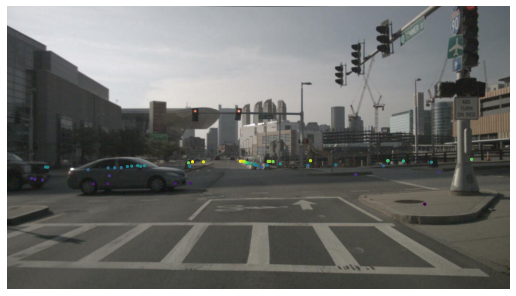

In [92]:
nusc.render_pointcloud_in_image(my_sample['token'],
                                pointsensor_channel='RADAR_FRONT',
                                camera_channel='CAM_FRONT',
                                render_intensity=False,
                                show_lidarseg=False,
                                filter_lidarseg_labels=False,
                                show_lidarseg_legend=False)

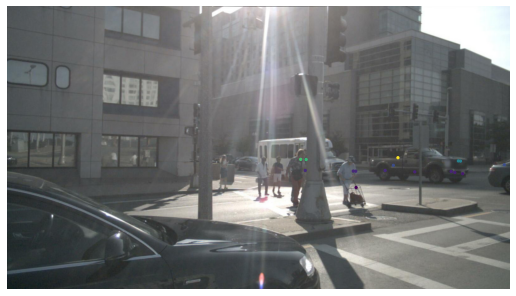

In [93]:
nusc.render_pointcloud_in_image(my_sample['token'],
                                pointsensor_channel='RADAR_FRONT',
                                camera_channel='CAM_FRONT_LEFT',
                                render_intensity=False,
                                show_lidarseg=False,
                                filter_lidarseg_labels=False,
                                show_lidarseg_legend=False)

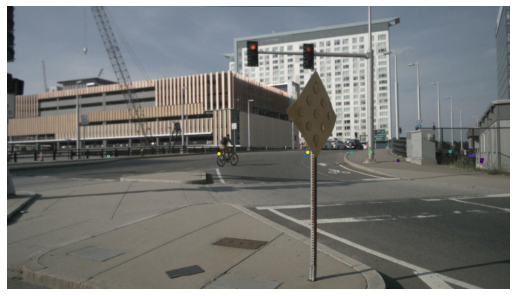

In [95]:
nusc.render_pointcloud_in_image(my_sample['token'],
                                pointsensor_channel='RADAR_FRONT_RIGHT',
                                camera_channel='CAM_FRONT_RIGHT',
                                render_intensity=False,
                                show_lidarseg=False,
                                filter_lidarseg_labels=False,
                                show_lidarseg_legend=False)